In [ ]:
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
print("Shape of dataset:", df.shape)
print("\nInfo:")
print(df.info())
print("\nDescribe:")
print(df.describe(include='all'))


Shape of dataset: (891, 12)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Describe:
        PassengerId    Survived      Pclass                 Name   Sex  \
count    891.000000  891.000000  891.000000                  891   891   
unique          NaN         NaN         NaN  

In [ ]:
from sklearn.impute import SimpleImputer

age_imputer = SimpleImputer(strategy='mean')
df['Age'] = age_imputer.fit_transform(df[['Age']])

df['Cabin'].fillna('Unknown', inplace=True)

mode_embarked = df['Embarked'].mode()[0]
df['Embarked'].fillna(mode_embarked, inplace=True)


/tmp/ipython-input-3-2053958636.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cabin'].fillna('Unknown', inplace=True)
/tmp/ipython-input-3-2053958636.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

In [ ]:
female_survived = df[(df['Sex'] == 'female') & (df['Survived'] == 1)]
print(female_survived[['Name', 'Survived']])


                                                  Name  Survived
1    Cumings, Mrs. John Bradley (Florence Briggs Th...         1
2                               Heikkinen, Miss. Laina         1
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)         1
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)         1
9                  Nasser, Mrs. Nicholas (Adele Achem)         1
..                                                 ...       ...
874              Abelson, Mrs. Samuel (Hannah Wizosky)         1
875                   Najib, Miss. Adele Kiamie "Jane"         1
879      Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)         1
880       Shelley, Mrs. William (Imanita Parrish Hall)         1
887                       Graham, Miss. Margaret Edith         1

[233 rows x 2 columns]


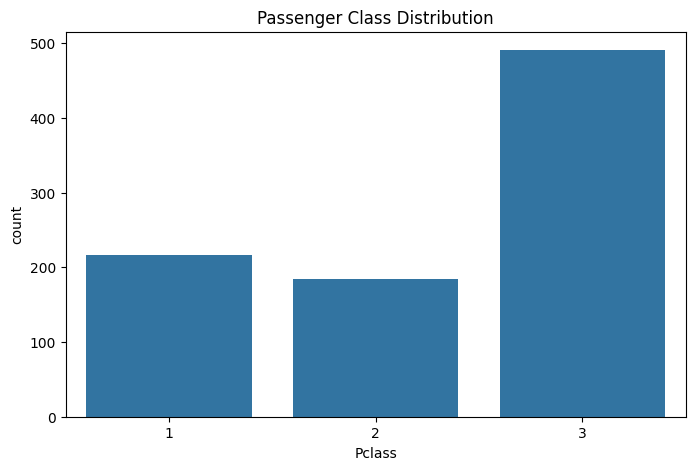

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(x='Pclass', data=df)
plt.title('Passenger Class Distribution')
plt.show()


In [ ]:
young_3rd_class = df[(df['Pclass'] == 3) & (df['Age'] < 18)]
print(young_3rd_class[['Name', 'Age', 'Pclass']])


                                        Name   Age  Pclass
7             Palsson, Master. Gosta Leonard   2.0       3
10           Sandstrom, Miss. Marguerite Rut   4.0       3
14      Vestrom, Miss. Hulda Amanda Adolfina  14.0       3
16                      Rice, Master. Eugene   2.0       3
22               McGowan, Miss. Anna "Annie"  15.0       3
..                                       ...   ...     ...
844                      Culumovic, Mr. Jeso  17.0       3
850  Andersson, Master. Sigvard Harald Elias   4.0       3
852                  Boulos, Miss. Nourelain   9.0       3
869          Johnson, Master. Harold Theodor   4.0       3
875         Najib, Miss. Adele Kiamie "Jane"  15.0       3

[78 rows x 3 columns]


In [ ]:
old_1st_class = df[(df['Pclass'] == 1) & (df['Age'] > 40)]
print(old_1st_class[['Name', 'Age', 'Pclass']])


                                                  Name   Age  Pclass
6                              McCarthy, Mr. Timothy J  54.0       1
11                            Bonnell, Miss. Elizabeth  58.0       1
35                      Holverson, Mr. Alexander Oskar  42.0       1
52            Harper, Mrs. Henry Sleeper (Myna Haxtun)  49.0       1
54                      Ostby, Mr. Engelhart Cornelius  65.0       1
..                                                 ...   ...     ...
856         Wick, Mrs. George Dennick (Mary Hitchcock)  45.0       1
857                             Daly, Mr. Peter Denis   51.0       1
862  Swift, Mrs. Frederick Joel (Margaret Welles Ba...  48.0       1
871   Beckwith, Mrs. Richard Leonard (Sallie Monypeny)  47.0       1
879      Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)  56.0       1

[76 rows x 3 columns]


In [ ]:
survived_old_1st_class = old_1st_class[old_1st_class['Survived'] == 1]
print(survived_old_1st_class[['Name', 'Age', 'Pclass', 'Survived']])


                                                  Name   Age  Pclass  Survived
11                            Bonnell, Miss. Elizabeth  58.0       1         1
52            Harper, Mrs. Henry Sleeper (Myna Haxtun)  49.0       1         1
187      Romaine, Mr. Charles Hallace ("Mr C Rolmane")  45.0       1         1
194          Brown, Mrs. James Joseph (Margaret Tobin)  44.0       1         1
195                               Lurette, Miss. Elise  58.0       1         1
268      Graham, Mrs. William Thompson (Edith Junkins)  58.0       1         1
275                  Andrews, Miss. Kornelia Theodosia  63.0       1         1
299    Baxter, Mrs. James (Helene DeLaudeniere Chaput)  50.0       1         1
337                    Burns, Miss. Elizabeth Margaret  41.0       1         1
366   Warren, Mrs. Frank Manley (Anna Sophia Atkinson)  60.0       1         1
380                              Bidois, Miss. Rosalie  42.0       1         1
449                     Peuchen, Major. Arthur Godfr

In [ ]:
male_fare_gt_100 = df[(df['Sex'] == 'male') & (df['Fare'] > 100)]
print(male_fare_gt_100[['Name', 'Fare', 'Sex']])


                                           Name      Fare   Sex
27               Fortune, Mr. Charles Alexander  263.0000  male
118                    Baxter, Mr. Quigg Edmond  247.5208  male
305              Allison, Master. Hudson Trevor  151.5500  male
332                   Graham, Mr. George Edward  153.4625  male
373                         Ringhini, Mr. Sante  135.6333  male
377                   Widener, Mr. Harry Elkins  211.5000  male
390                  Carter, Mr. William Ernest  120.0000  male
438                           Fortune, Mr. Mark  263.0000  male
505  Penasco y Castellana, Mr. Victor de Satode  108.9000  male
527                          Farthing, Mr. John  221.7792  male
544                  Douglas, Mr. Walter Donald  106.4250  male
550                 Thayer, Mr. John Borland Jr  110.8833  male
557                         Robbins, Mr. Victor  227.5250  male
659                  Newell, Mr. Arthur Webster  113.2750  male
660               Frauenthal, Dr. Henry 

In [ ]:
embarked_C_class2 = df[(df['Embarked'] == 'C') & (df['Pclass'] == 2)]
print(embarked_C_class2[['Name', 'Embarked', 'Pclass']])


                                                  Name Embarked  Pclass
9                  Nasser, Mrs. Nicholas (Adele Achem)        C       2
43            Laroche, Miss. Simonne Marie Anne Andree        C       2
122                               Nasser, Mr. Nicholas        C       2
135                                 Richard, Mr. Emile        C       2
181                                   Pernot, Mr. Rene        C       2
292                             Levy, Mr. Rene Jacques        C       2
308                                Abelson, Mr. Samuel        C       2
361                          del Carlo, Mr. Sebastiano        C       2
389                              Lehmann, Miss. Bertha        C       2
473       Jerwan, Mrs. Amin S (Marie Marthe Thuillard)        C       2
547                         Padro y Manent, Mr. Julian        C       2
608  Laroche, Mrs. Joseph (Juliette Marie Louise La...        C       2
685             Laroche, Mr. Joseph Philippe Lemercier        C 

In [ ]:
sibsp_gt_2 = df[df['SibSp'] > 2]
print(sibsp_gt_2[['Name', 'SibSp']])


                                                  Name  SibSp
7                       Palsson, Master. Gosta Leonard      3
16                                Rice, Master. Eugene      4
24                       Palsson, Miss. Torborg Danira      3
27                      Fortune, Mr. Charles Alexander      3
50                          Panula, Master. Juha Niilo      4
59                  Goodwin, Master. William Frederick      5
63                               Skoog, Master. Harald      3
68                     Andersson, Miss. Erna Alexandra      4
71                          Goodwin, Miss. Lillian Amy      5
85   Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...      3
88                          Fortune, Miss. Mabel Helen      3
119                  Andersson, Miss. Ellis Anna Maria      4
159                         Sage, Master. Thomas Henry      8
164                       Panula, Master. Eino Viljami      4
171                               Rice, Master. Arthur      4
176     

In [ ]:
no_family_not_survived = df[(df['Survived'] == 0) & (df['SibSp'] == 0) & (df['Parch'] == 0)]
print(no_family_not_survived[['Name', 'SibSp', 'Parch', 'Survived']])


                                     Name  SibSp  Parch  Survived
4                Allen, Mr. William Henry      0      0         0
5                        Moran, Mr. James      0      0         0
6                 McCarthy, Mr. Timothy J      0      0         0
12         Saundercock, Mr. William Henry      0      0         0
14   Vestrom, Miss. Hulda Amanda Adolfina      0      0         0
..                                    ...    ...    ...       ...
882          Dahlberg, Miss. Gerda Ulrika      0      0         0
883         Banfield, Mr. Frederick James      0      0         0
884                Sutehall, Mr. Henry Jr      0      0         0
886                 Montvila, Rev. Juozas      0      0         0
890                   Dooley, Mr. Patrick      0      0         0

[374 rows x 4 columns]


In [ ]:
survived_passengers = df[df['Survived'] == 1]

top5_oldest_survived = survived_passengers.sort_values(by='Age', ascending=False).head(5)

print("Top 5 oldest passengers who survived:")
print(top5_oldest_survived[['Name', 'Age', 'Survived']])


Top 5 oldest passengers who survived:
                                          Name   Age  Survived
630       Barkworth, Mr. Algernon Henry Wilson  80.0         1
275          Andrews, Miss. Kornelia Theodosia  63.0         1
483                     Turkula, Mrs. (Hedwig)  63.0         1
570                         Harris, Mr. George  62.0         1
829  Stone, Mrs. George Nelson (Martha Evelyn)  62.0         1


In [ ]:
zero_fare_passengers = df[df['Fare'] == 0]

print("Passengers who paid zero fare:")
print(zero_fare_passengers[['Name', 'Fare']])


Passengers who paid zero fare:
                                 Name  Fare
179               Leonard, Mr. Lionel   0.0
263             Harrison, Mr. William   0.0
271      Tornquist, Mr. William Henry   0.0
277       Parkes, Mr. Francis "Frank"   0.0
302   Johnson, Mr. William Cahoone Jr   0.0
413    Cunningham, Mr. Alfred Fleming   0.0
466             Campbell, Mr. William   0.0
481  Frost, Mr. Anthony Wood "Archie"   0.0
597               Johnson, Mr. Alfred   0.0
633     Parr, Mr. William Henry Marsh   0.0
674        Watson, Mr. Ennis Hastings   0.0
732              Knight, Mr. Robert J   0.0
806            Andrews, Mr. Thomas Jr   0.0
815                  Fry, Mr. Richard   0.0
822   Reuchlin, Jonkheer. John George   0.0


In [ ]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

print(f"Training set shape: {train_df.shape}")
print(f"Testing set shape: {test_df.shape}")


Training set shape: (712, 12)
Testing set shape: (179, 12)
